# EDA
## 1. 사기와 아닌 데이터 구분

In [1]:
df = pd.read_csv('./datas/insurance_fraud_detect_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               16000 non-null  int64  
 1   car_model              16000 non-null  int64  
 2   sharing_type           16000 non-null  int64  
 3   age_group              16000 non-null  int64  
 4   has_previous_accident  16000 non-null  int64  
 5   cumulative_use_count   16000 non-null  int64  
 6   b2b                    16000 non-null  int64  
 7   accident_ratio         16000 non-null  int64  
 8   pf_type                16000 non-null  int64  
 9   socarpass              16000 non-null  int64  
 10  socarsave              16000 non-null  int64  
 11  start_hour             16000 non-null  int64  
 12  duration               16000 non-null  int64  
 13  accident_hour          16000 non-null  int64  
 14  repair_cost            16000 non-null  float64
 15  in

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [26]:
from matplotlib import font_manager, rc

f_path = '/Library/Fonts/Arial Unicode.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

In [3]:
df_fr_t = df[df.fraud_YN == 1]
df_fr_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 6 to 11179
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               41 non-null     int64  
 1   car_model              41 non-null     int64  
 2   sharing_type           41 non-null     int64  
 3   age_group              41 non-null     int64  
 4   has_previous_accident  41 non-null     int64  
 5   cumulative_use_count   41 non-null     int64  
 6   b2b                    41 non-null     int64  
 7   accident_ratio         41 non-null     int64  
 8   pf_type                41 non-null     int64  
 9   socarpass              41 non-null     int64  
 10  socarsave              41 non-null     int64  
 11  start_hour             41 non-null     int64  
 12  duration               41 non-null     int64  
 13  accident_hour          41 non-null     int64  
 14  repair_cost            41 non-null     float64
 15  insur

In [4]:
df_fr_f = df[df.fraud_YN == 0]
df_fr_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15959 entries, 0 to 15999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fraud_YN               15959 non-null  int64  
 1   car_model              15959 non-null  int64  
 2   sharing_type           15959 non-null  int64  
 3   age_group              15959 non-null  int64  
 4   has_previous_accident  15959 non-null  int64  
 5   cumulative_use_count   15959 non-null  int64  
 6   b2b                    15959 non-null  int64  
 7   accident_ratio         15959 non-null  int64  
 8   pf_type                15959 non-null  int64  
 9   socarpass              15959 non-null  int64  
 10  socarsave              15959 non-null  int64  
 11  start_hour             15959 non-null  int64  
 12  duration               15959 non-null  int64  
 13  accident_hour          15959 non-null  int64  
 14  repair_cost            15959 non-null  float64
 15  in

In [2]:
df.fraud_YN[df.repair_cnt.isin([1,2,3])].sum()

41

## Yenabeam

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

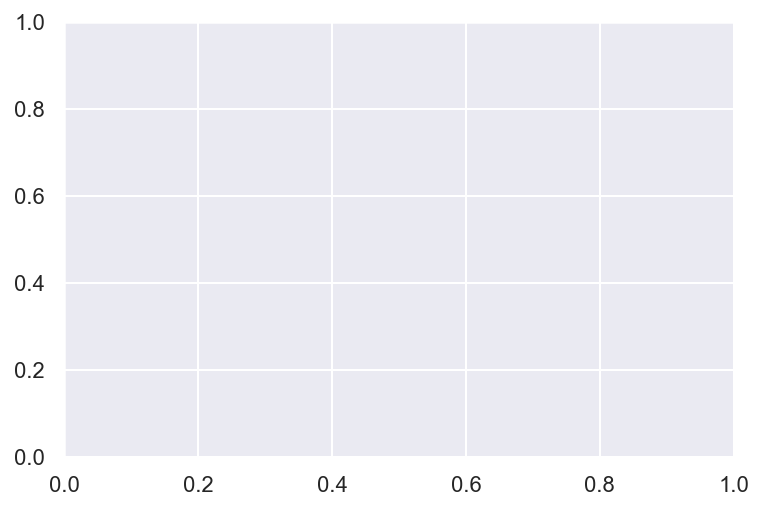

In [150]:
plt.xticks()

/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


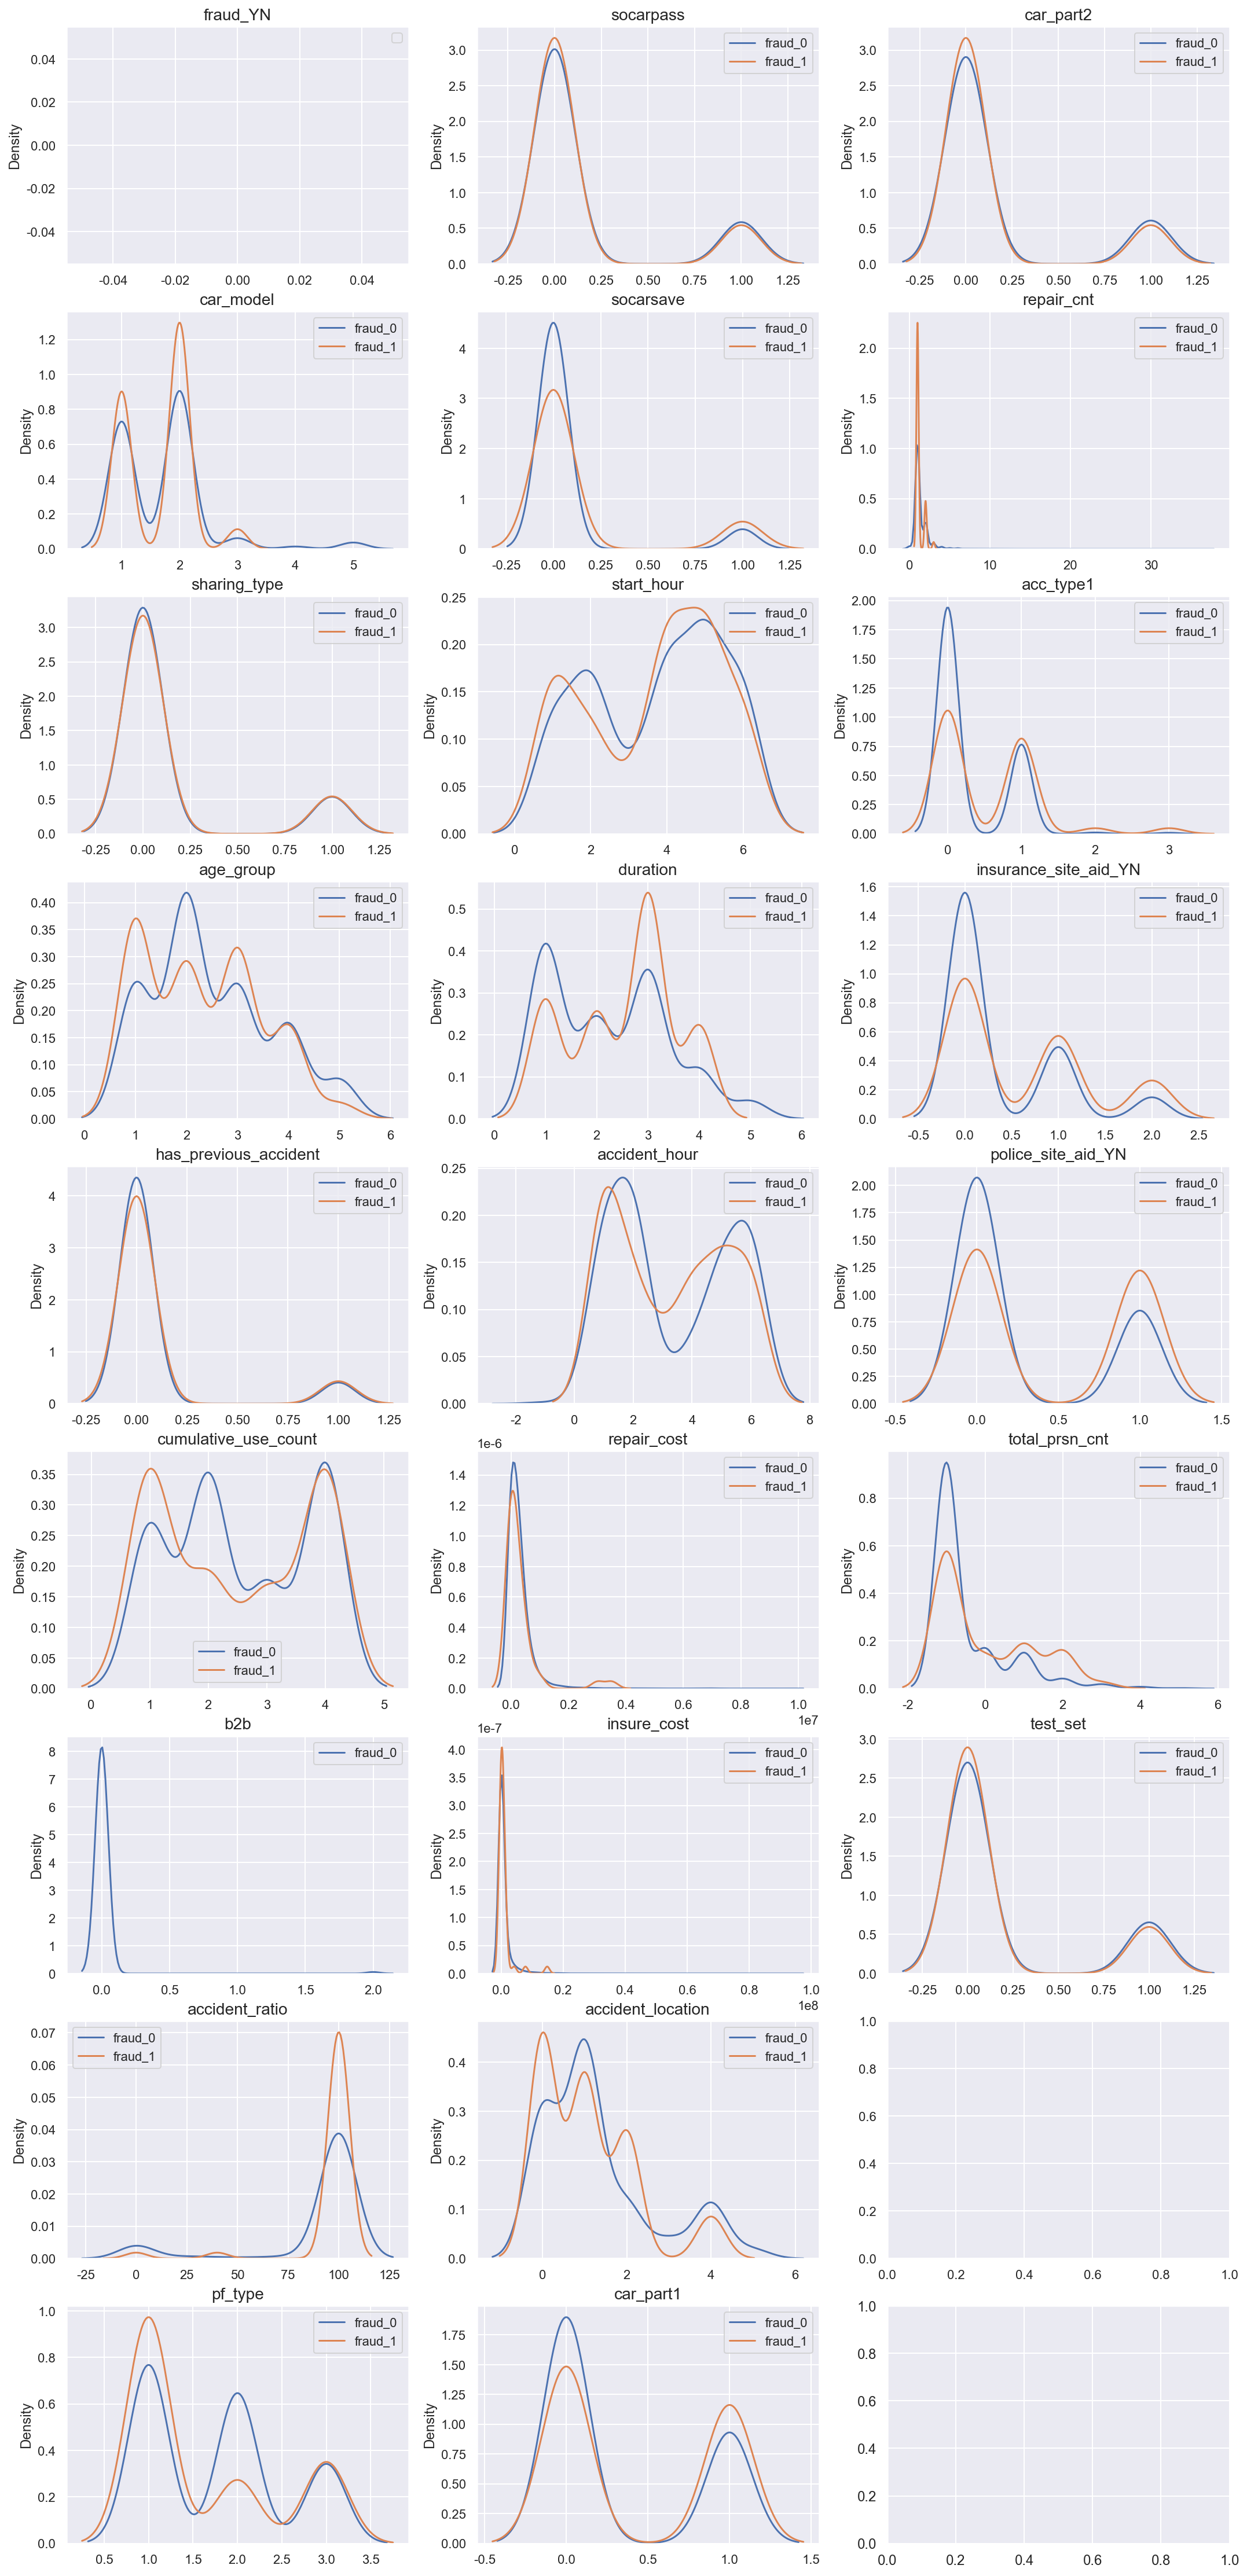

In [162]:
#kdeplot 으로 column간 density 비교
fig, axes = plt.subplots(9, 3, figsize=(18,40))
axes = axes.T.flatten()

for idx, feature in enumerate(df.columns.values):
    sns.kdeplot(df_fr_f[feature], bw_method=0.3, label='fraud_0', ax=axes[idx])
    sns.kdeplot(df_fr_t[feature], bw_method=0.3, label='fraud_1', ax=axes[idx])    
    
    axes[idx].set_title(feature, fontsize=14)
    axes[idx].set_xlabel('')
    axes[idx].legend()

    plt.tick_params(axis='both', which='major', labelsize=12)

In [163]:
df_fr_t['police_site_aid_YN'].unique()

array([1, 0])

## 3. 사기인 데이터만 분석

TypeError: figtext() missing 2 required positional arguments: 'y' and 's'

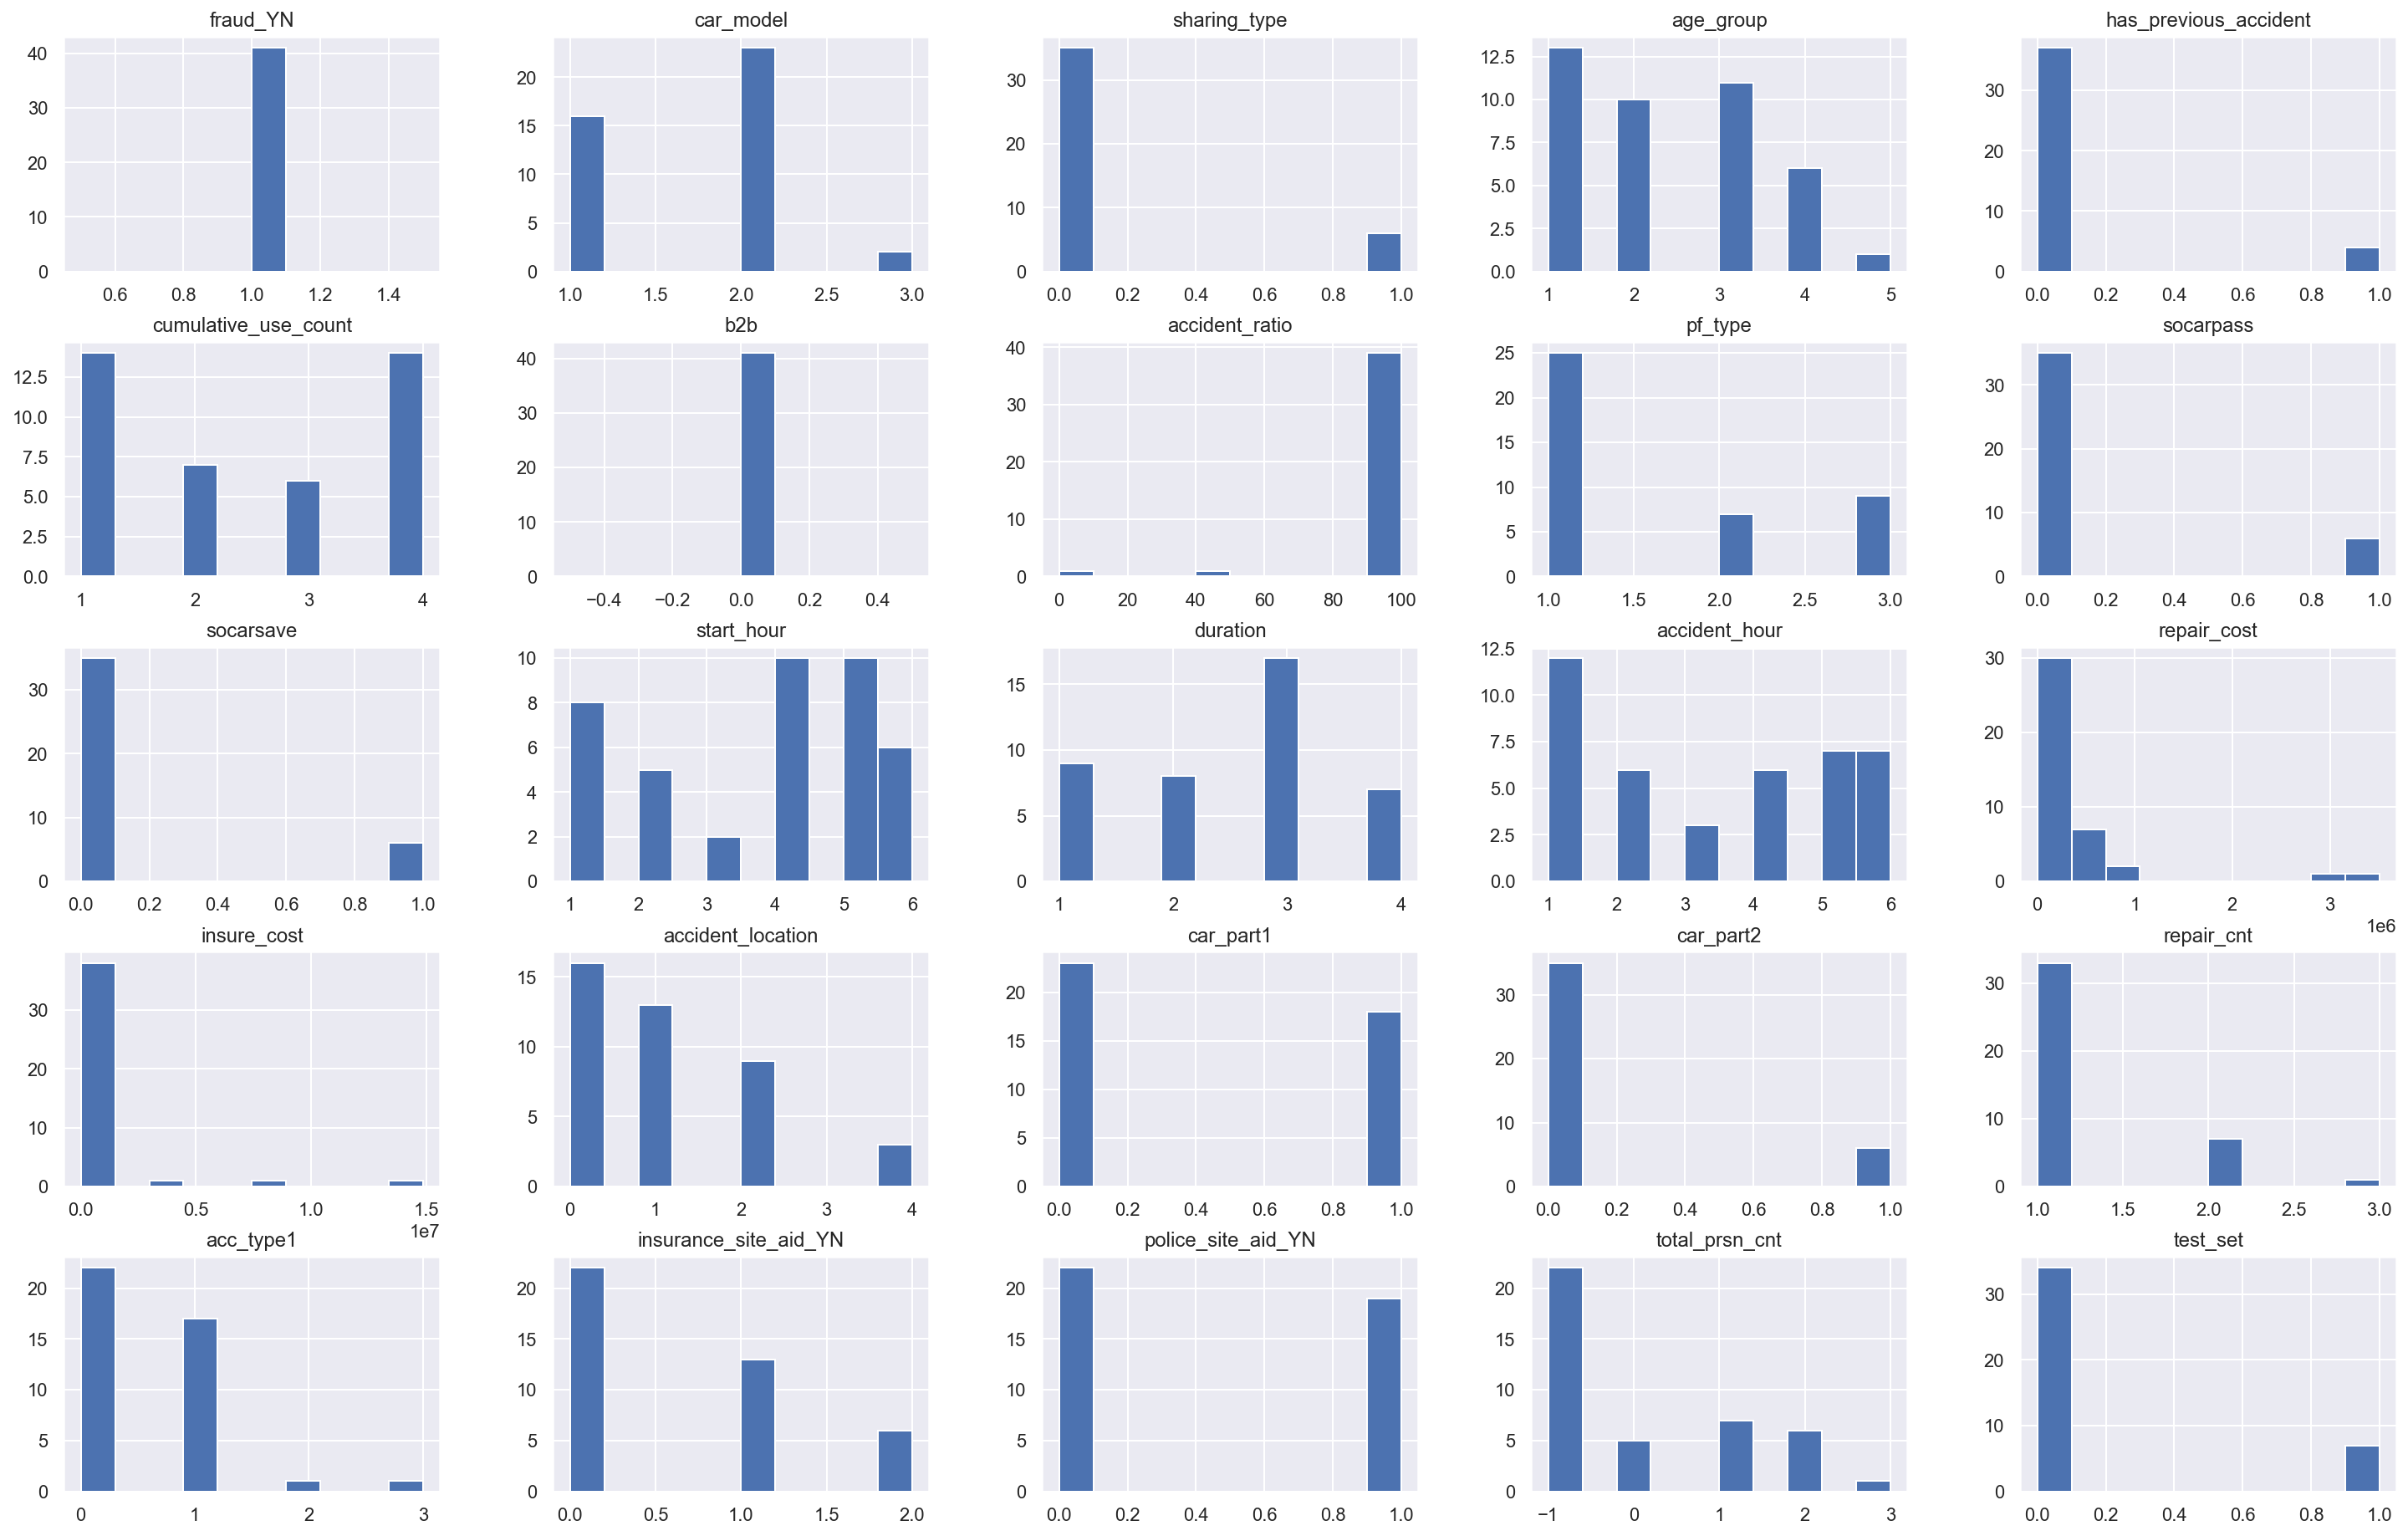

In [113]:
df_fr_t.hist(figsize=(25,16));
plt.figtext(1)

In [55]:
for cols in df_fr_t.columns:
    print(f"[{cols}]")
    for idx, value in df_fr_t[cols].value_counts().iteritems():
        print(f"{idx} : {value}", "/" , end=' ')
    print()    
    print('=========', sep='\n')

[fraud_YN]
1 : 41 / 
[car_model]
2 : 23 / 1 : 16 / 3 : 2 / 
[sharing_type]
0 : 35 / 1 : 6 / 
[age_group]
1 : 13 / 3 : 11 / 2 : 10 / 4 : 6 / 5 : 1 / 
[has_previous_accident]
0 : 37 / 1 : 4 / 
[cumulative_use_count]
4 : 14 / 1 : 14 / 2 : 7 / 3 : 6 / 
[b2b]
0 : 41 / 
[accident_ratio]
100 : 39 / 40 : 1 / 0 : 1 / 
[pf_type]
1 : 25 / 3 : 9 / 2 : 7 / 
[socarpass]
0 : 35 / 1 : 6 / 
[socarsave]
0 : 35 / 1 : 6 / 
[start_hour]
5 : 10 / 4 : 10 / 1 : 8 / 6 : 6 / 2 : 5 / 3 : 2 / 
[duration]
3 : 17 / 1 : 9 / 2 : 8 / 4 : 7 / 
[accident_hour]
1 : 12 / 6 : 7 / 5 : 7 / 4 : 6 / 2 : 6 / 3 : 3 / 
[repair_cost]
0.0 : 23 / 183486.5085 : 2 / 387896.8028 : 1 / 323583.5555 : 1 / 464616.8081 : 1 / 143994.9183 : 1 / 582234.7992 : 1 / 429342.2131 : 1 / 3507659.1580000003 : 1 / 463640.7121 : 1 / 875554.0352 : 1 / 218102.5032 : 1 / 3007611.4489999996 : 1 / 1014625.327 : 1 / 440365.0152 : 1 / 337301.0013 : 1 / 365926.909 : 1 / 182175.8208 : 1 / 
[insure_cost]
0 : 21 / 351260 : 1 / 4192150 : 1 / 320000 : 1 / 1372160 : 

In [63]:
round(20/41 ,2)

0.49

- 차 모델에 수입은 없다
- 나이대는 21, 23, 27 까지 [34건/83%]
- 누적사고 유 [4건]
- 누적대여 10번이상과 1번이 [28건/68%]
- 전부 개인
- 과실율 100% [39건/95%]
- 보험료 타입 자기부담금 낮은것(보험금 높은것) [25건/61%]
- 소카패스, 소카세이브 [6건/15%]
- 시작시간 아침 8시부터 13시까지 [20건/49%]
- 대여기간 36시간 이하 [17건] 나머지(기본대여 세팅 4시간 9건) 고르게 [평균 8건]
- 사고시각 0시-4시, 21시-23시 [12건] 고른편?
- 수리부위 1개 [33건]
- 보험사 현장출동 모른다[22건]
- 신고 미신고 모른다 [22건]
- 탑승인원 미확인 [22건]

In [65]:
pd.options.display.max_columns = None

In [71]:
df_fr_t

,fraud_YN,car_model,sharing_type,age_group,has_previous_accident,cumulative_use_count,b2b,accident_ratio,pf_type,socarpass,socarsave,start_hour,duration,accident_hour,repair_cost,insure_cost,accident_location,car_part1,car_part2,repair_cnt,acc_type1,insurance_site_aid_YN,police_site_aid_YN,total_prsn_cnt,test_set
6,1,1,1,3,0,4,0,100,3,0,0,6,3,1,0.000,1217280,0,0,0,1,1,2,1,2,0
18,1,1,0,1,0,4,0,100,1,0,0,1,2,1,3007611.449,0,1,0,0,2,0,0,0,-1,0
45,1,2,0,1,0,2,0,100,1,1,1,5,4,6,0.000,0,0,1,0,1,0,0,0,-1,0
60,1,1,0,3,0,3,0,100,3,0,0,2,4,1,0.000,0,0,1,0,1,0,0,0,-1,0
83,1,2,0,2,0,1,0,100,1,0,0,6,2,2,875554.035,0,1,0,0,1,0,0,0,-1,0
100,1,2,0,2,0,1,0,100,1,0,1,4,2,4,0.000,0,2,0,1,1,0,0,0,-1,1
119,1,2,1,5,0,4,0,100,3,1,0,2,3,2,0.000,4192150,0,0,0,1,2,1,1,2,0
143,1,2,0,1,0,3,0,40,2,1,0,2,1,1,365926.909,0,4,0,0,1,1,2,1,1,0
163,1,2,0,4,0,2,0,100,3,0,0,5,2,5,387896.803,963800,2,0,0,1,1,2,1,0,0
182,1,2,0,3,1,4,0,100,1,0,0,5,3,1,0.000,0,0,0,0,1,0,0,0,-1,1


## 4. 두 컬럼을 조합하여 전체와 사기를 비교

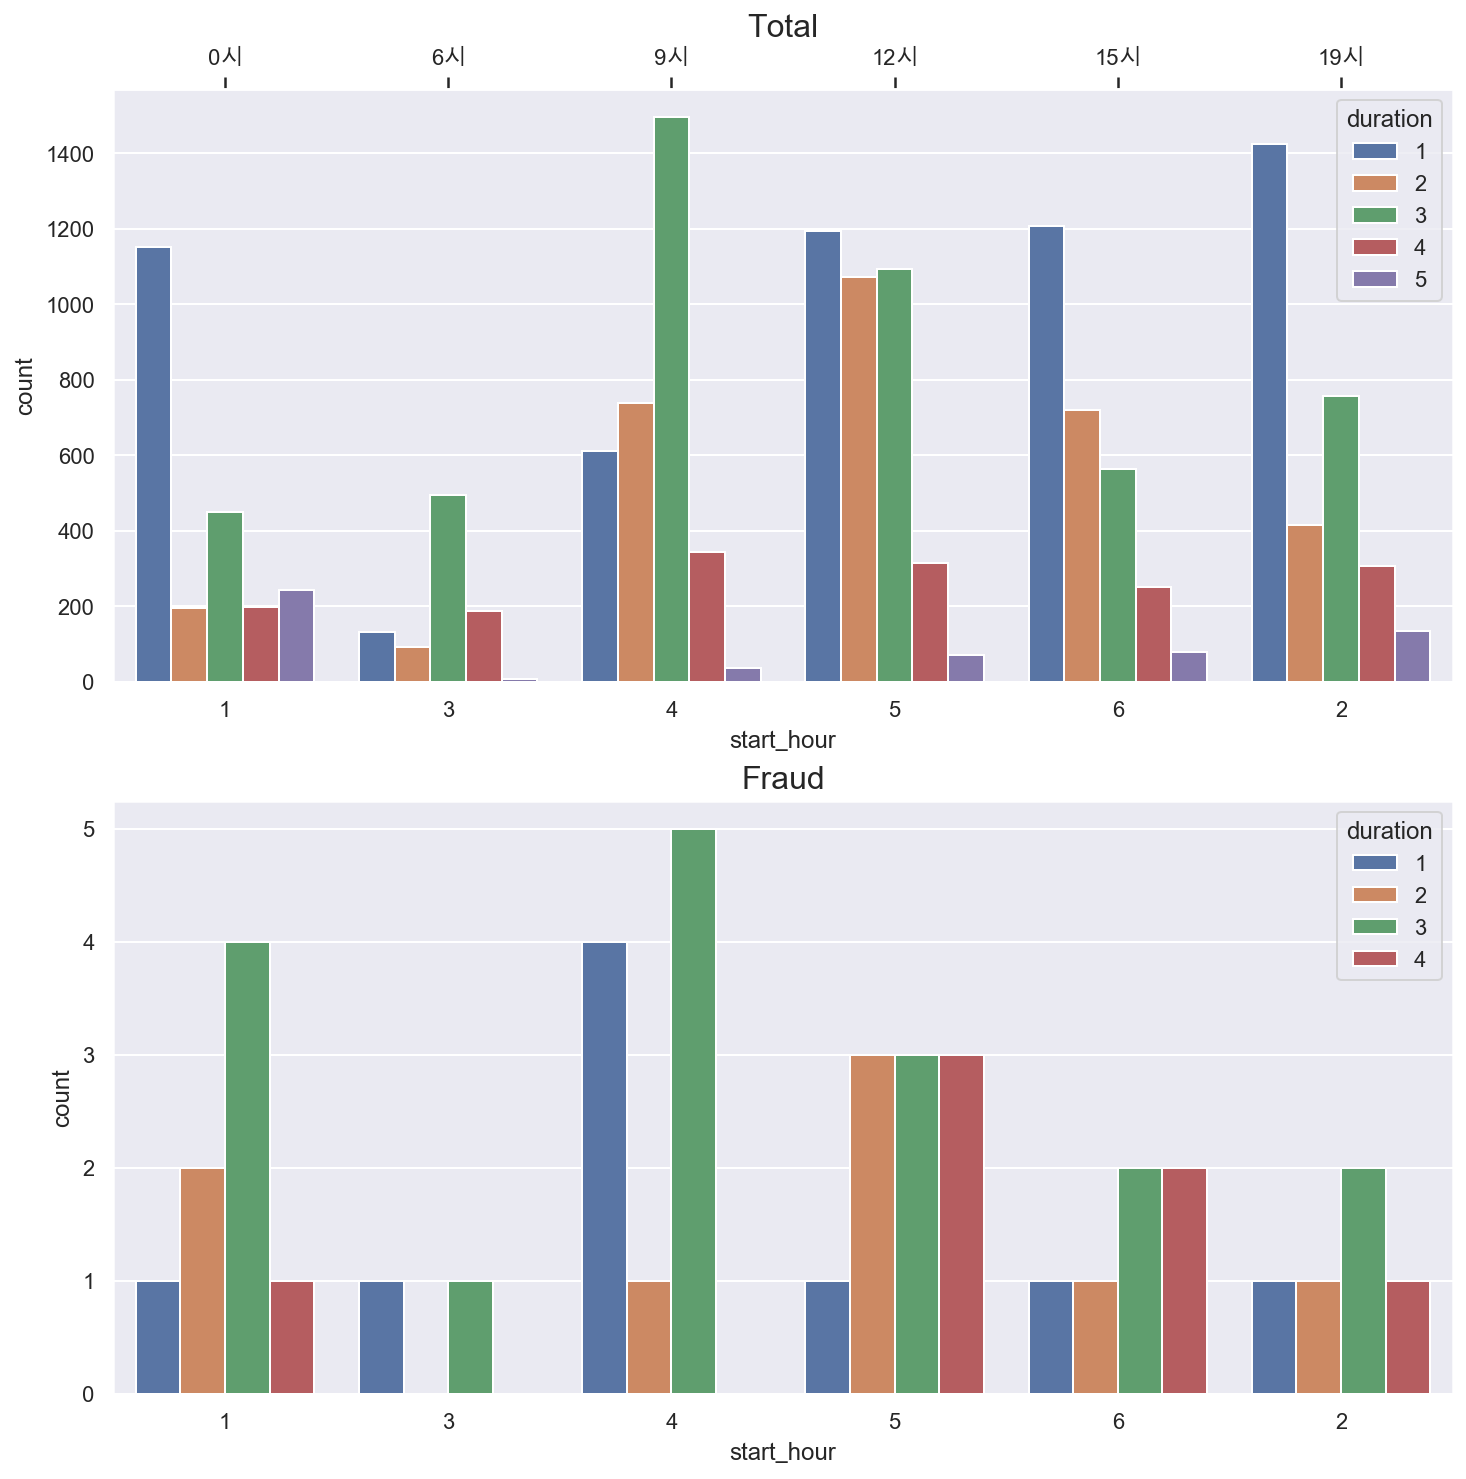

<Figure size 864x576 with 0 Axes>

In [249]:
# 일반적인 소카 유저와 사기 유저는 대여 패턴이 다를거라 생각.
# 이용시작시간과 대여기간을 동시에 분석하여 사기 유저의 이상점을 찾아보려함.

fig, ax = plt.subplots(2, 1, figsize=(12, 12))
plt.figure(figsize=(12,8))
sns.countplot(x='start_hour',hue='duration' ,data=df, ax=ax[0], order=[1,3,4,5,6,2])
ax[0].set_title('Total', fontsize=16)
ax_t = ax[0].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시'])

sns.countplot(x='start_hour',hue='duration' ,data=df_fr_t, ax=ax[1], order=[1,3,4,5,6,2]);
ax[1].set_title('Fraud', fontsize=16);

# 일반적인 소카 유저는 1.아침을 제외하곤 짧게 빌리고 2.아침에는 10시간이상 빌리는 비율이 높다(여행이라 추측)
# 사기 유저는 반면에 새벽과 밤에 길게 빌리거나 아침에 짧게 빌리는 경향.

# => 사기가 아닌척 하기 위해 오히려 길게 빌리는 것이 아닐까


In [258]:
df_tmp = pd.DataFrame(df.groupby(['start_hour','duration']).size()) * 100 / len(df)
df_tmp

0
start_hour duration      
1          1        7.206
           2        1.225
           3        2.812
           4        1.244
           5        1.525
2          1        8.906
           2        2.594
           3        4.737
           4        1.913
           5        0.850
3          1        0.831
           2        0.575
           3        3.100
           4        1.175
           5        0.050
4          1        3.831
           2        4.612
           3        9.350
           4        2.156
           5        0.225
5          1        7.463
           2        6.706
           3        6.844
           4        1.975
           5        0.450
6          1        7.556
           2        4.500
           3        3.519
           4        1.569
           5        0.500

In [270]:
df_tmp = pd.DataFrame(df_fr_f.groupby(['start_hour','duration']).size()) * 100 / len(df_fr_f)
df_tmp2 = df_tmp.sort_values(0, ascending=False)

In [271]:
df_tmp = pd.DataFrame(df_fr_t.groupby(['start_hour','duration']).size()) * 100 / len(df_fr_t)
df_tmp3 = df_tmp.sort_values(0, ascending=False)

In [272]:
df_tmp2.head(10)

0
start_hour duration      
4          3        9.343
2          1        8.923
6          1        7.569
5          1        7.475
1          1        7.218
5          3        6.843
           2        6.705
2          3        4.737
4          2        4.618
6          2        4.505

In [273]:
df_tmp3.head(10)

0
start_hour duration       
4          3        12.195
           1         9.756
1          3         9.756
5          4         7.317
           3         7.317
           2         7.317
1          2         4.878
6          3         4.878
           4         4.878
2          3         4.878

In [275]:
df_tmp4 = df_tmp3 - df_tmp2
df_tmp4.sort_values(0, ascending=False)

,,0
start_hour,duration,
1,3,6.961
4,1,5.940
5,4,5.356
1,2,3.662
6,4,3.318
4,3,2.852
3,1,1.612
6,3,1.363
1,4,1.198


In [261]:
df_tmp.sort_values(0, ascending=False)

0
start_hour duration      
4          3        9.350
2          1        8.906
6          1        7.556
5          1        7.463
1          1        7.206
5          3        6.844
           2        6.706
2          3        4.737
4          2        4.612
6          2        4.500
4          1        3.831
6          3        3.519
3          3        3.100
1          3        2.812
2          2        2.594
4          4        2.156
5          4        1.975
2          4        1.913
6          4        1.569
1          5        1.525
           4        1.244
           2        1.225
3          4        1.175
2          5        0.850
3          1        0.831
           2        0.575
6          5        0.500
5          5        0.450
4          5        0.225
3          5        0.050

## 

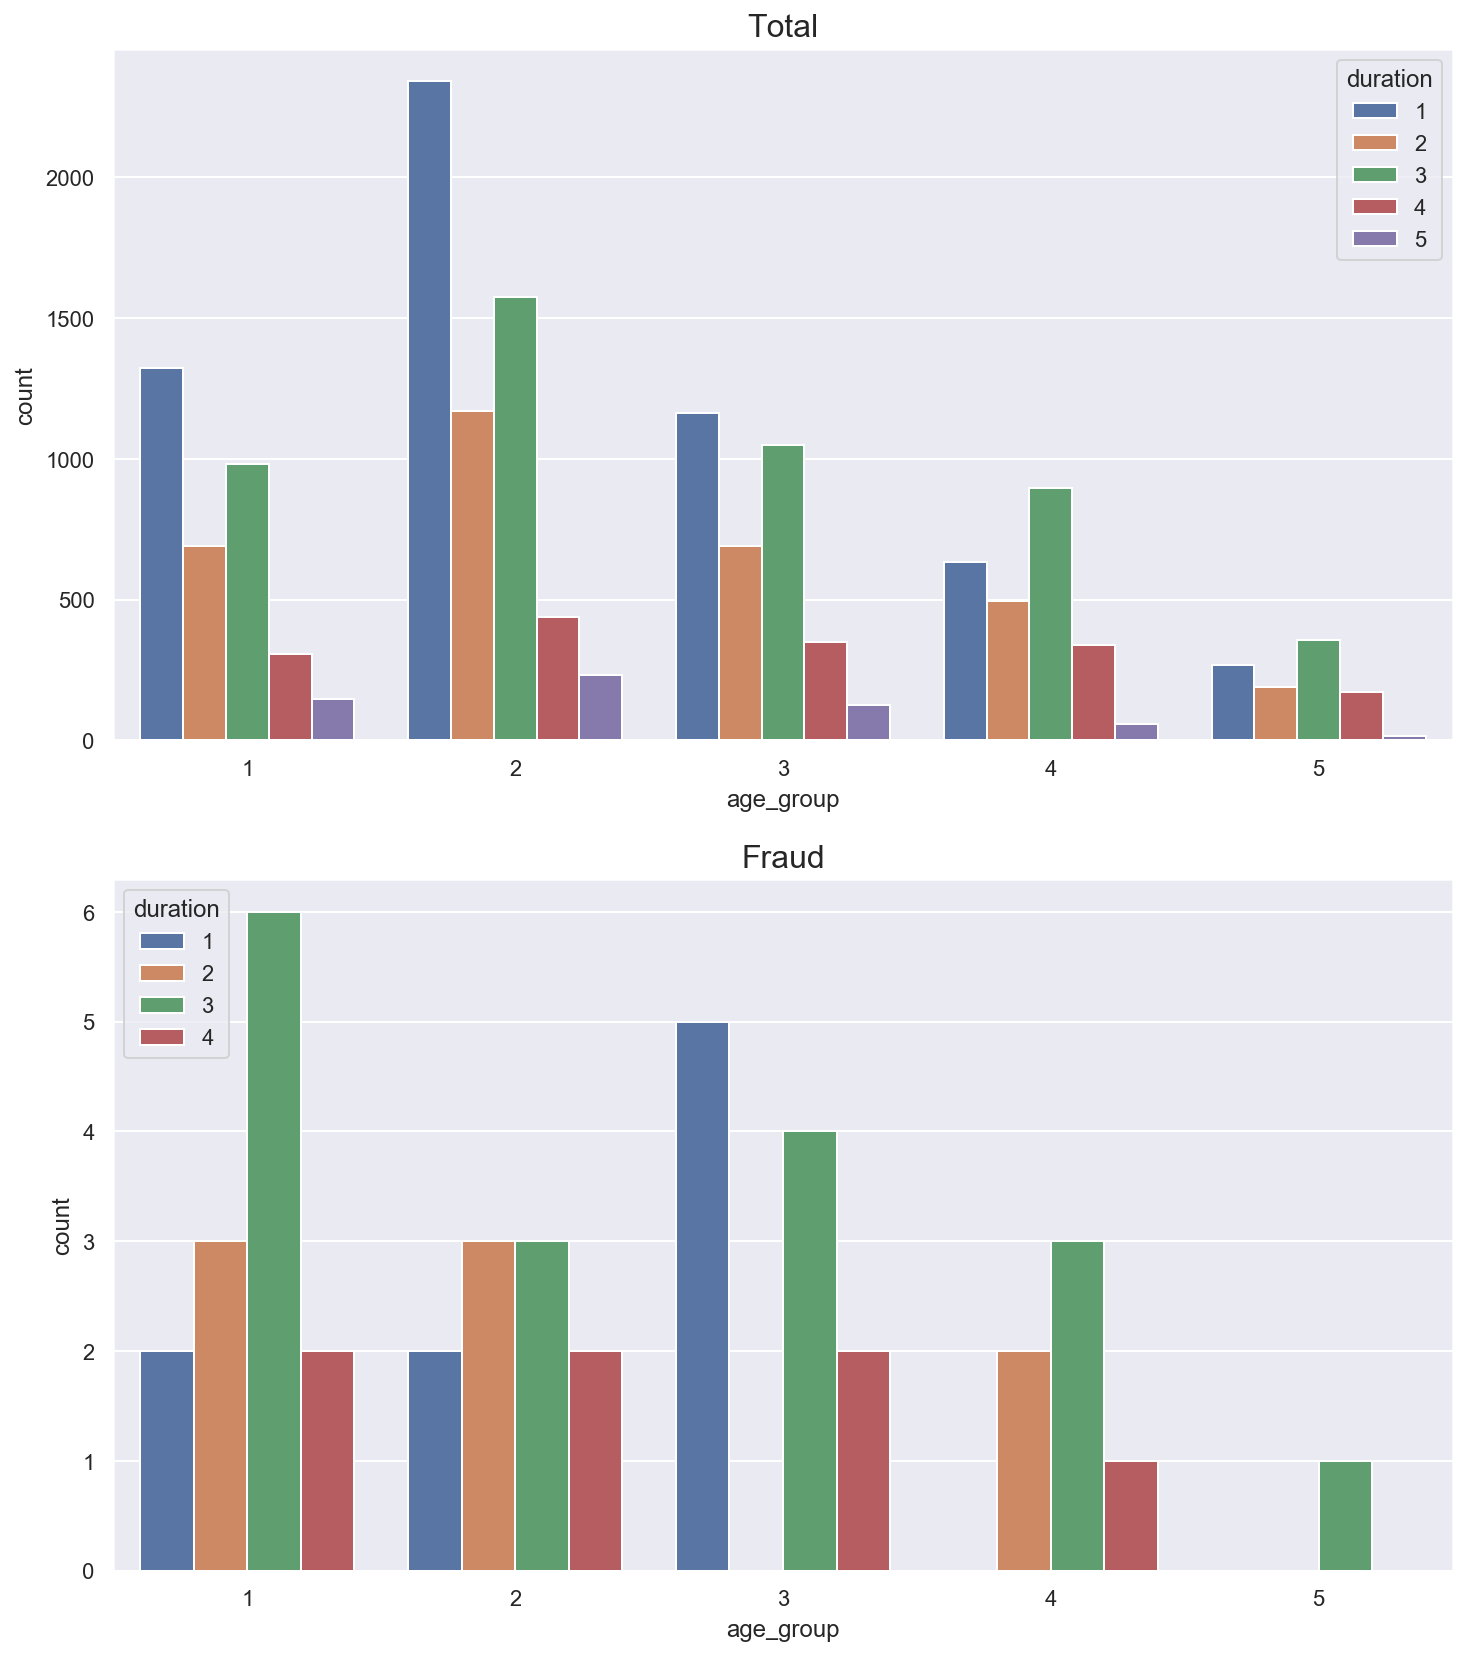

<Figure size 864x576 with 0 Axes>

In [41]:
# 나이와 대여기간
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='age_group',hue='duration' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='age_group',hue='duration' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

# 전체적으로는 나이와 상관없이 짧은대여, 10~15시간 대여, 6~9시간 대여 순인데반해
# Fraud는 어린 나이에서의 10~15시간 대여 비율이 도드라져보임
# => 

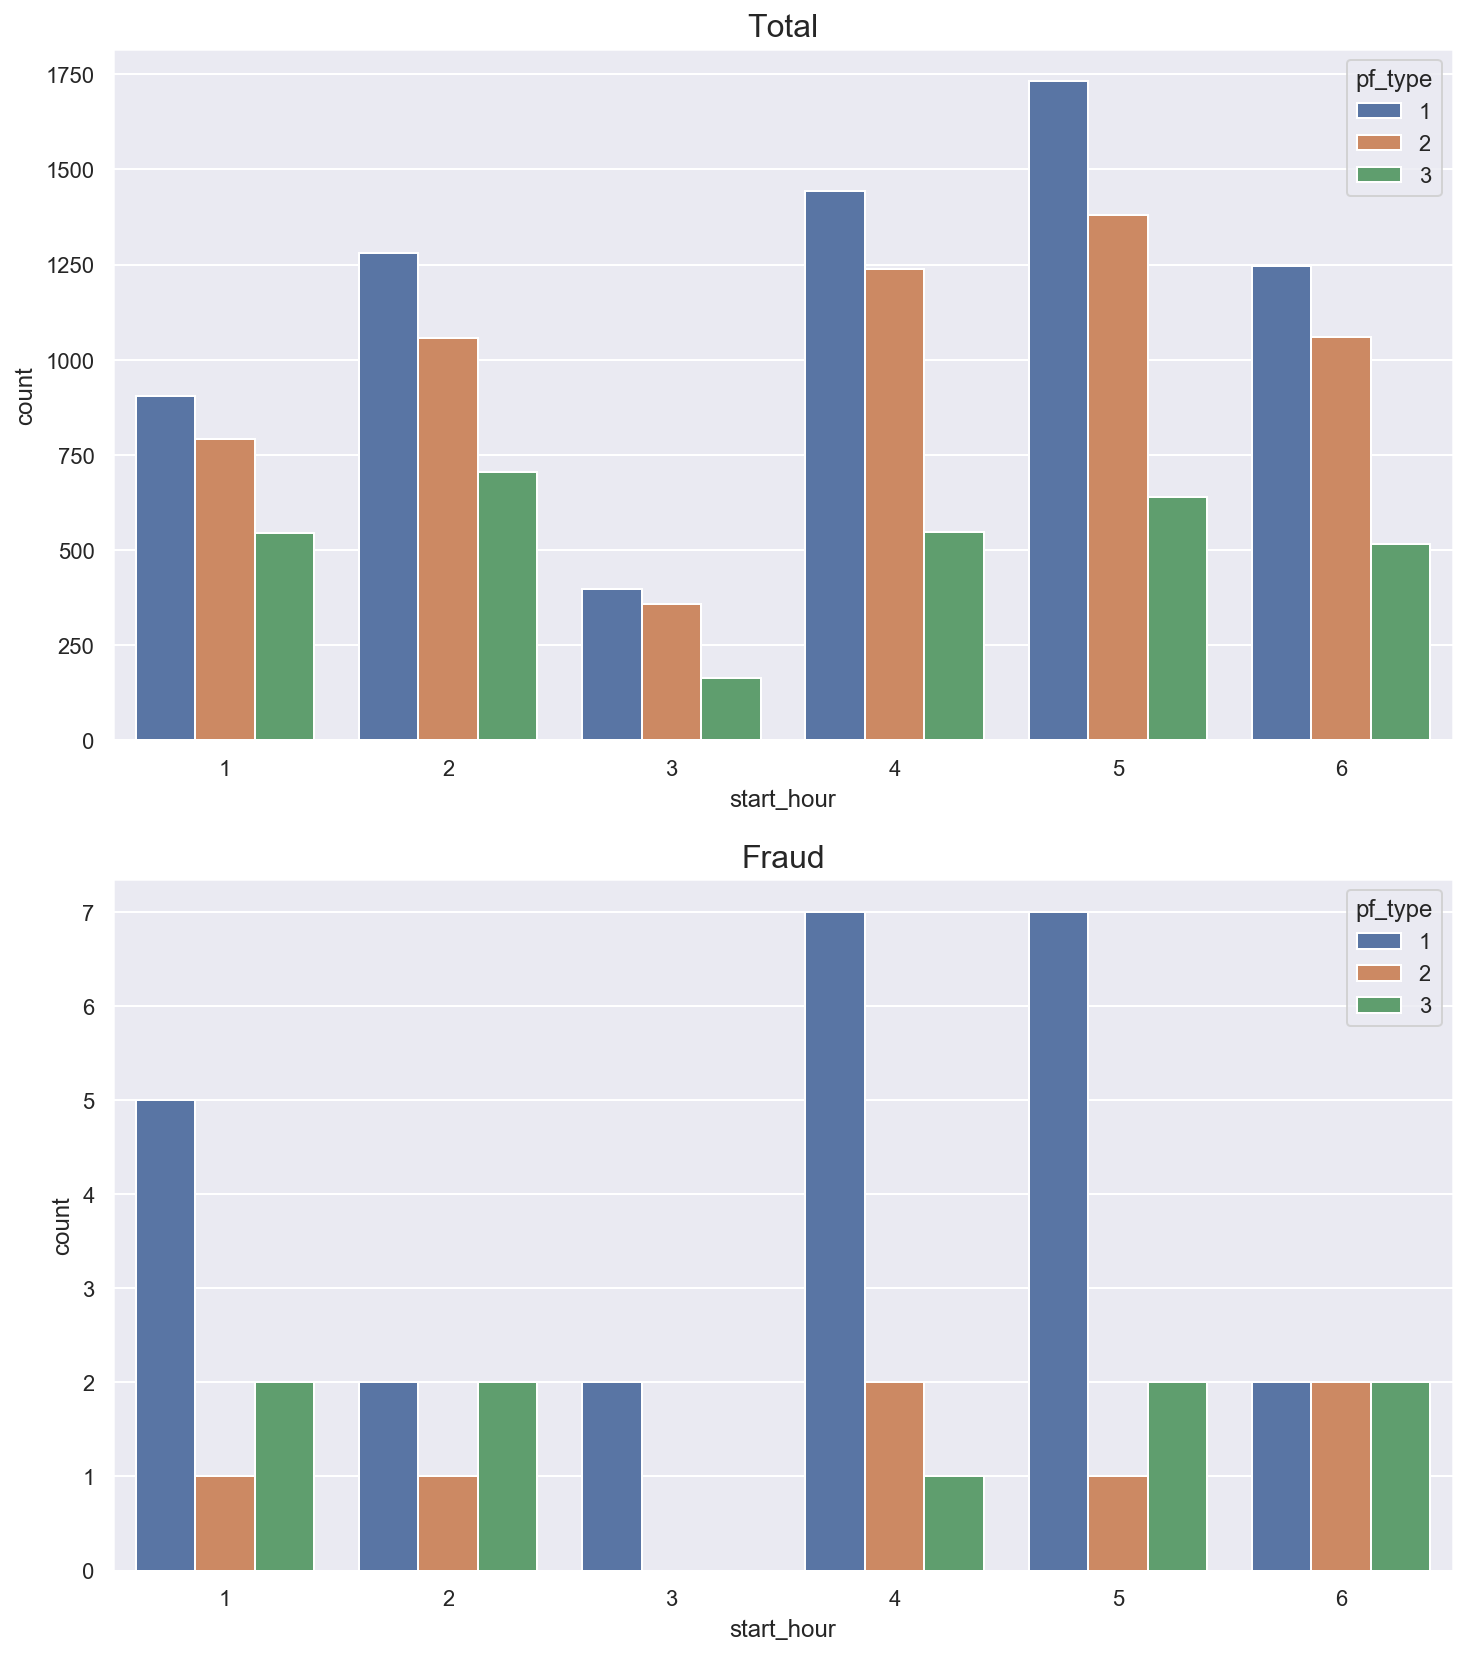

<Figure size 864x576 with 0 Axes>

In [43]:
# 나이와 보험 타입
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='start_hour',hue='pf_type' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='start_hour',hue='pf_type' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

# 자기부담금이 낮은 타입을 선택하는 것은 다 같았다
# Fraud는 어린 나이에서의 10~15시간 대여 비율이 도드라져보임
# => 

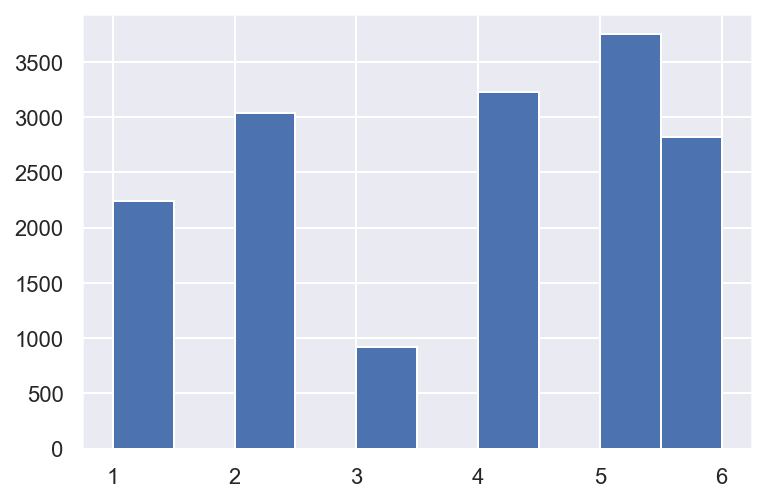

In [45]:
plt.hist(x='start_hour',data=df);

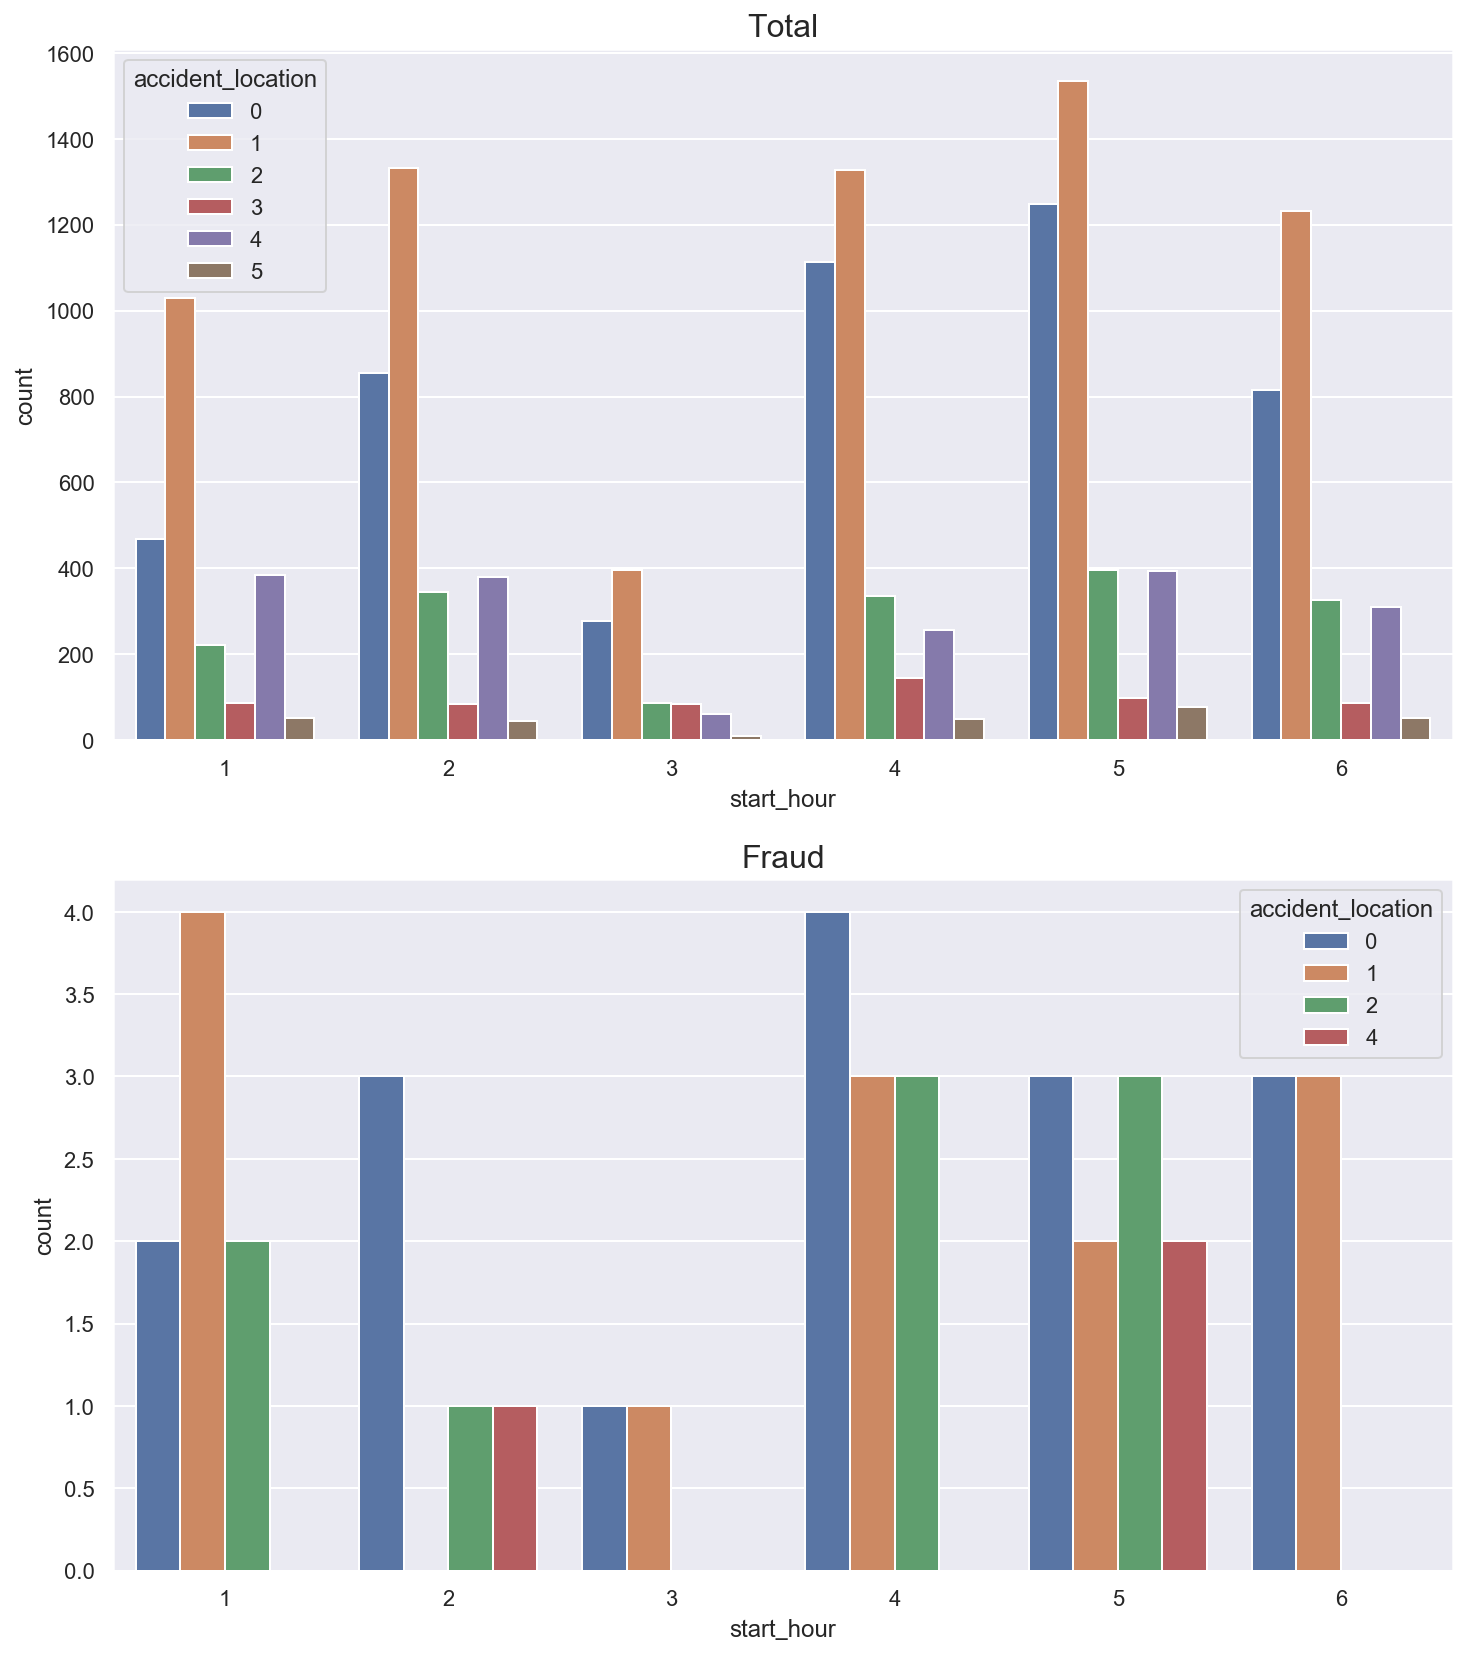

<Figure size 864x576 with 0 Axes>

In [132]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='start_hour',hue='accident_location' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='start_hour',hue='accident_location' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

In [215]:
import matplotlib.ticker as mticker

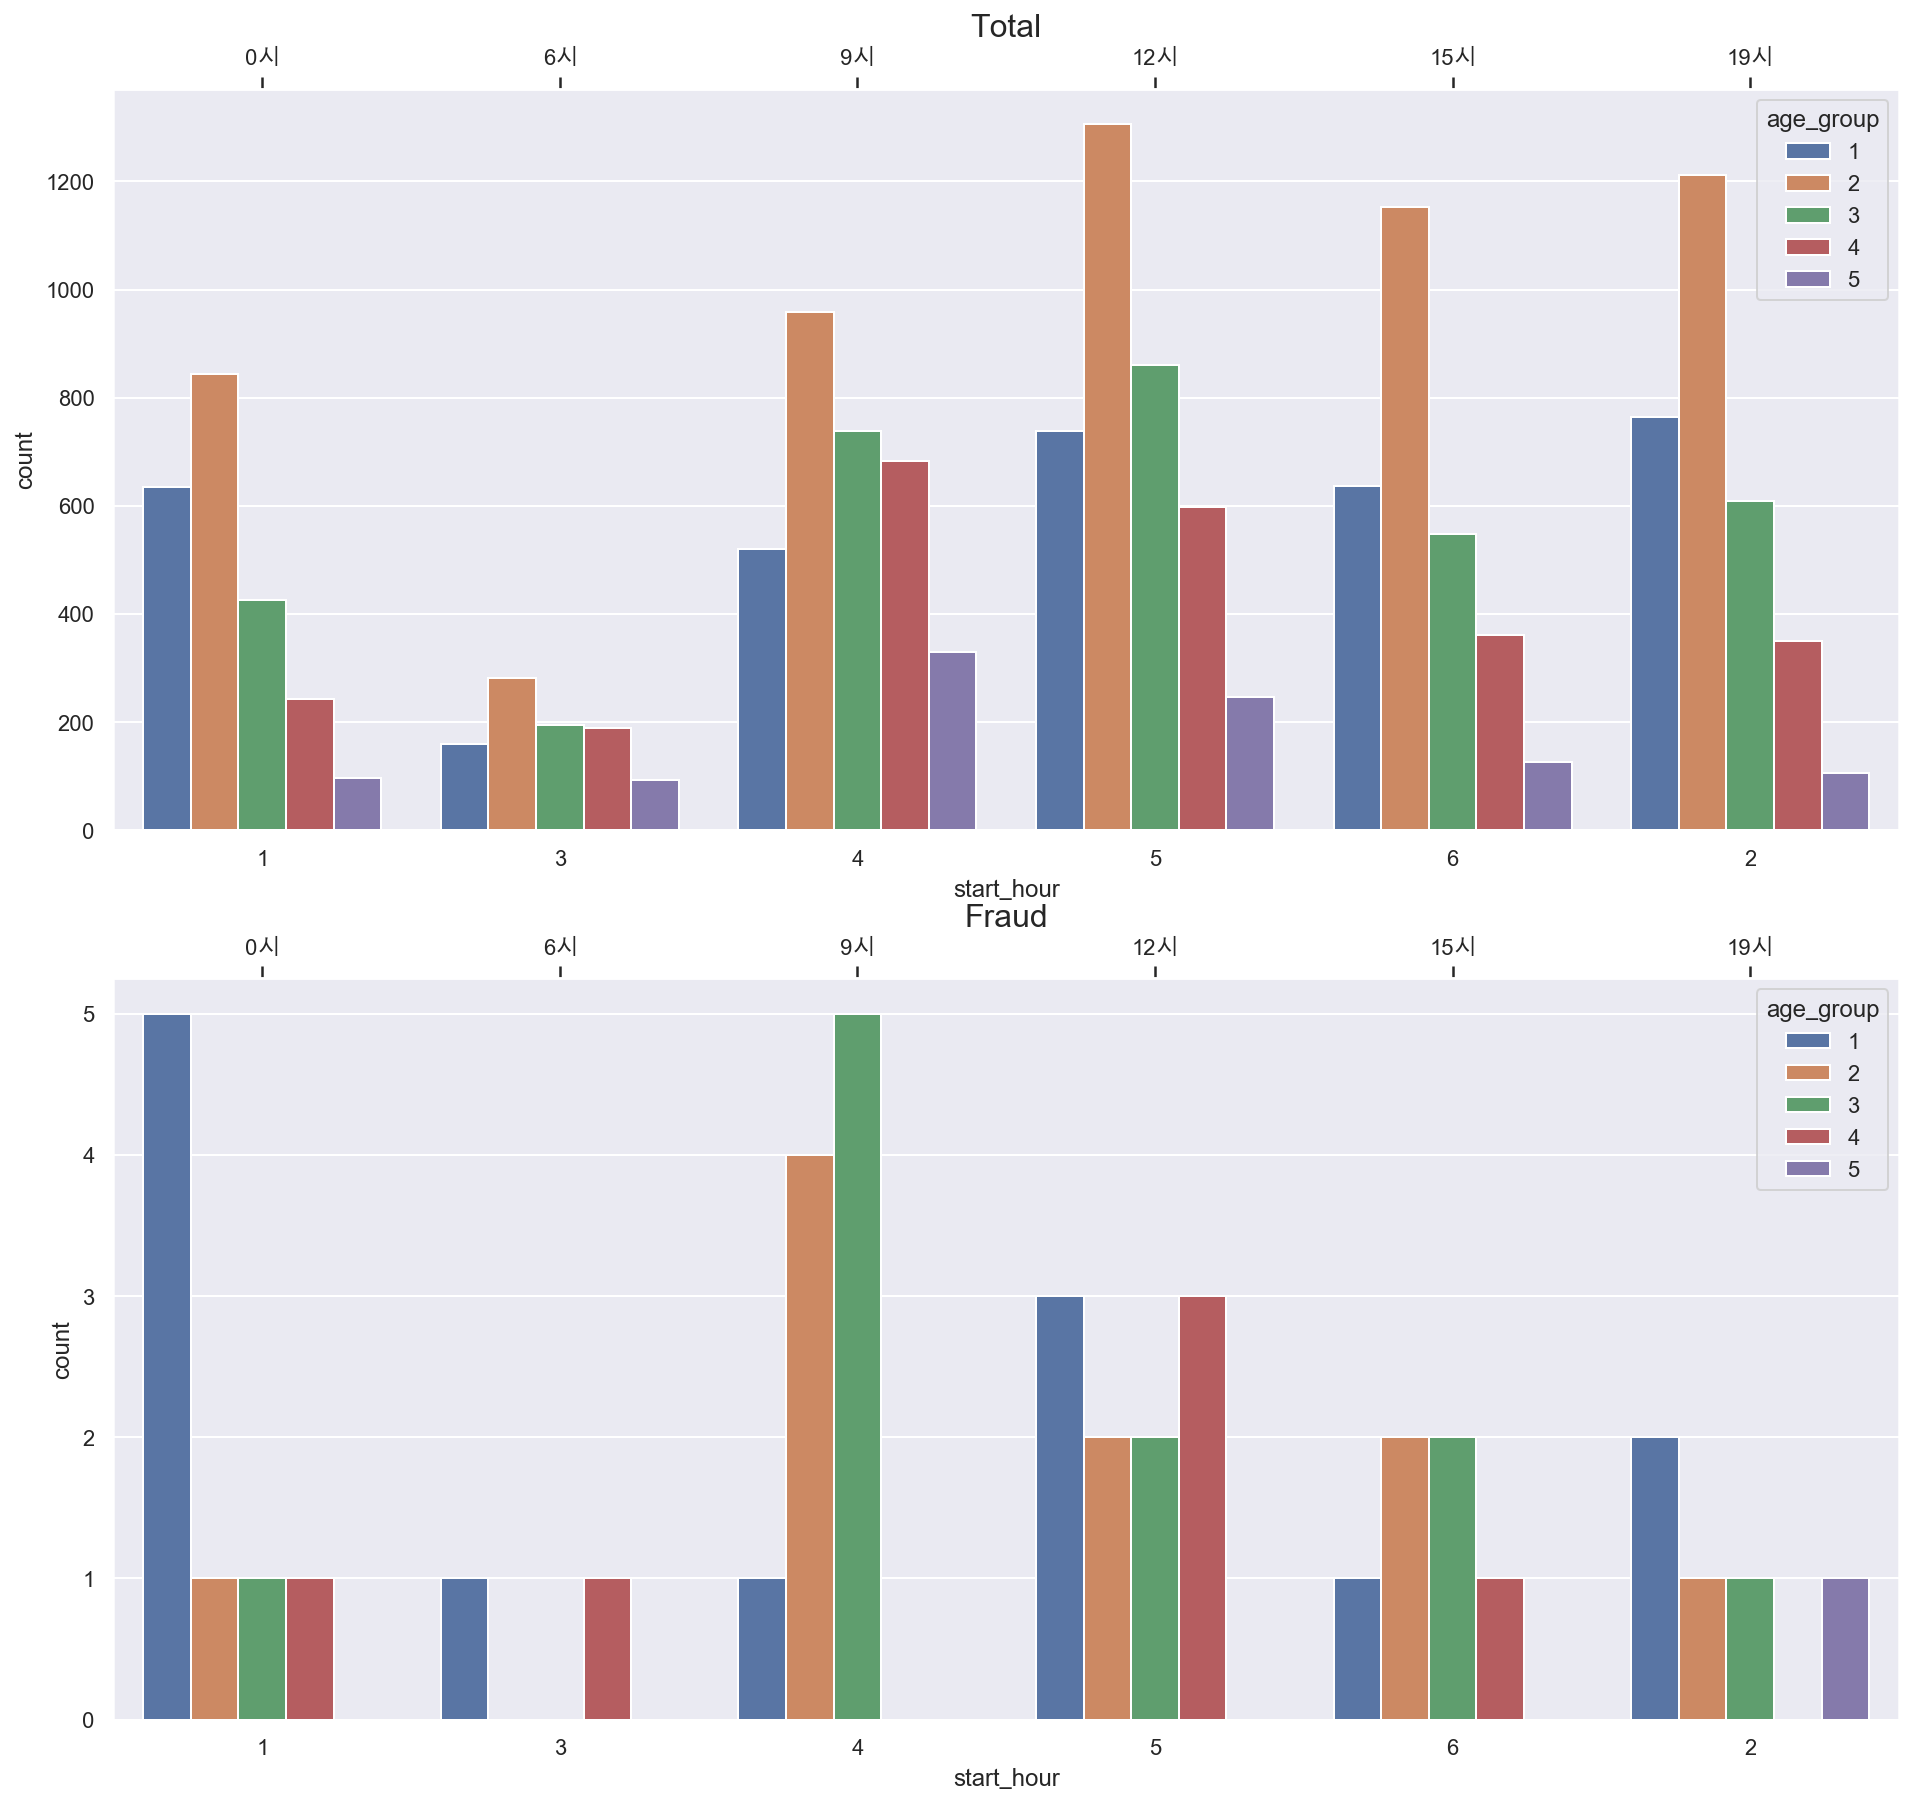

<Figure size 864x576 with 0 Axes>

In [244]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))
plt.figure(figsize=(12,8))

sns.countplot(x='start_hour',hue='age_group' ,data=df, ax=ax[0], order=[1,3,4,5,6,2])
ax[0].set_title('Total', fontsize=16)
ax_t = ax[0].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시'])

sns.countplot(x='start_hour',hue='age_group' ,data=df_fr_t, ax=ax[1], order=[1,3,4,5,6,2])
ax[1].set_title('Fraud', fontsize=16);
ax_t = ax[1].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시']);

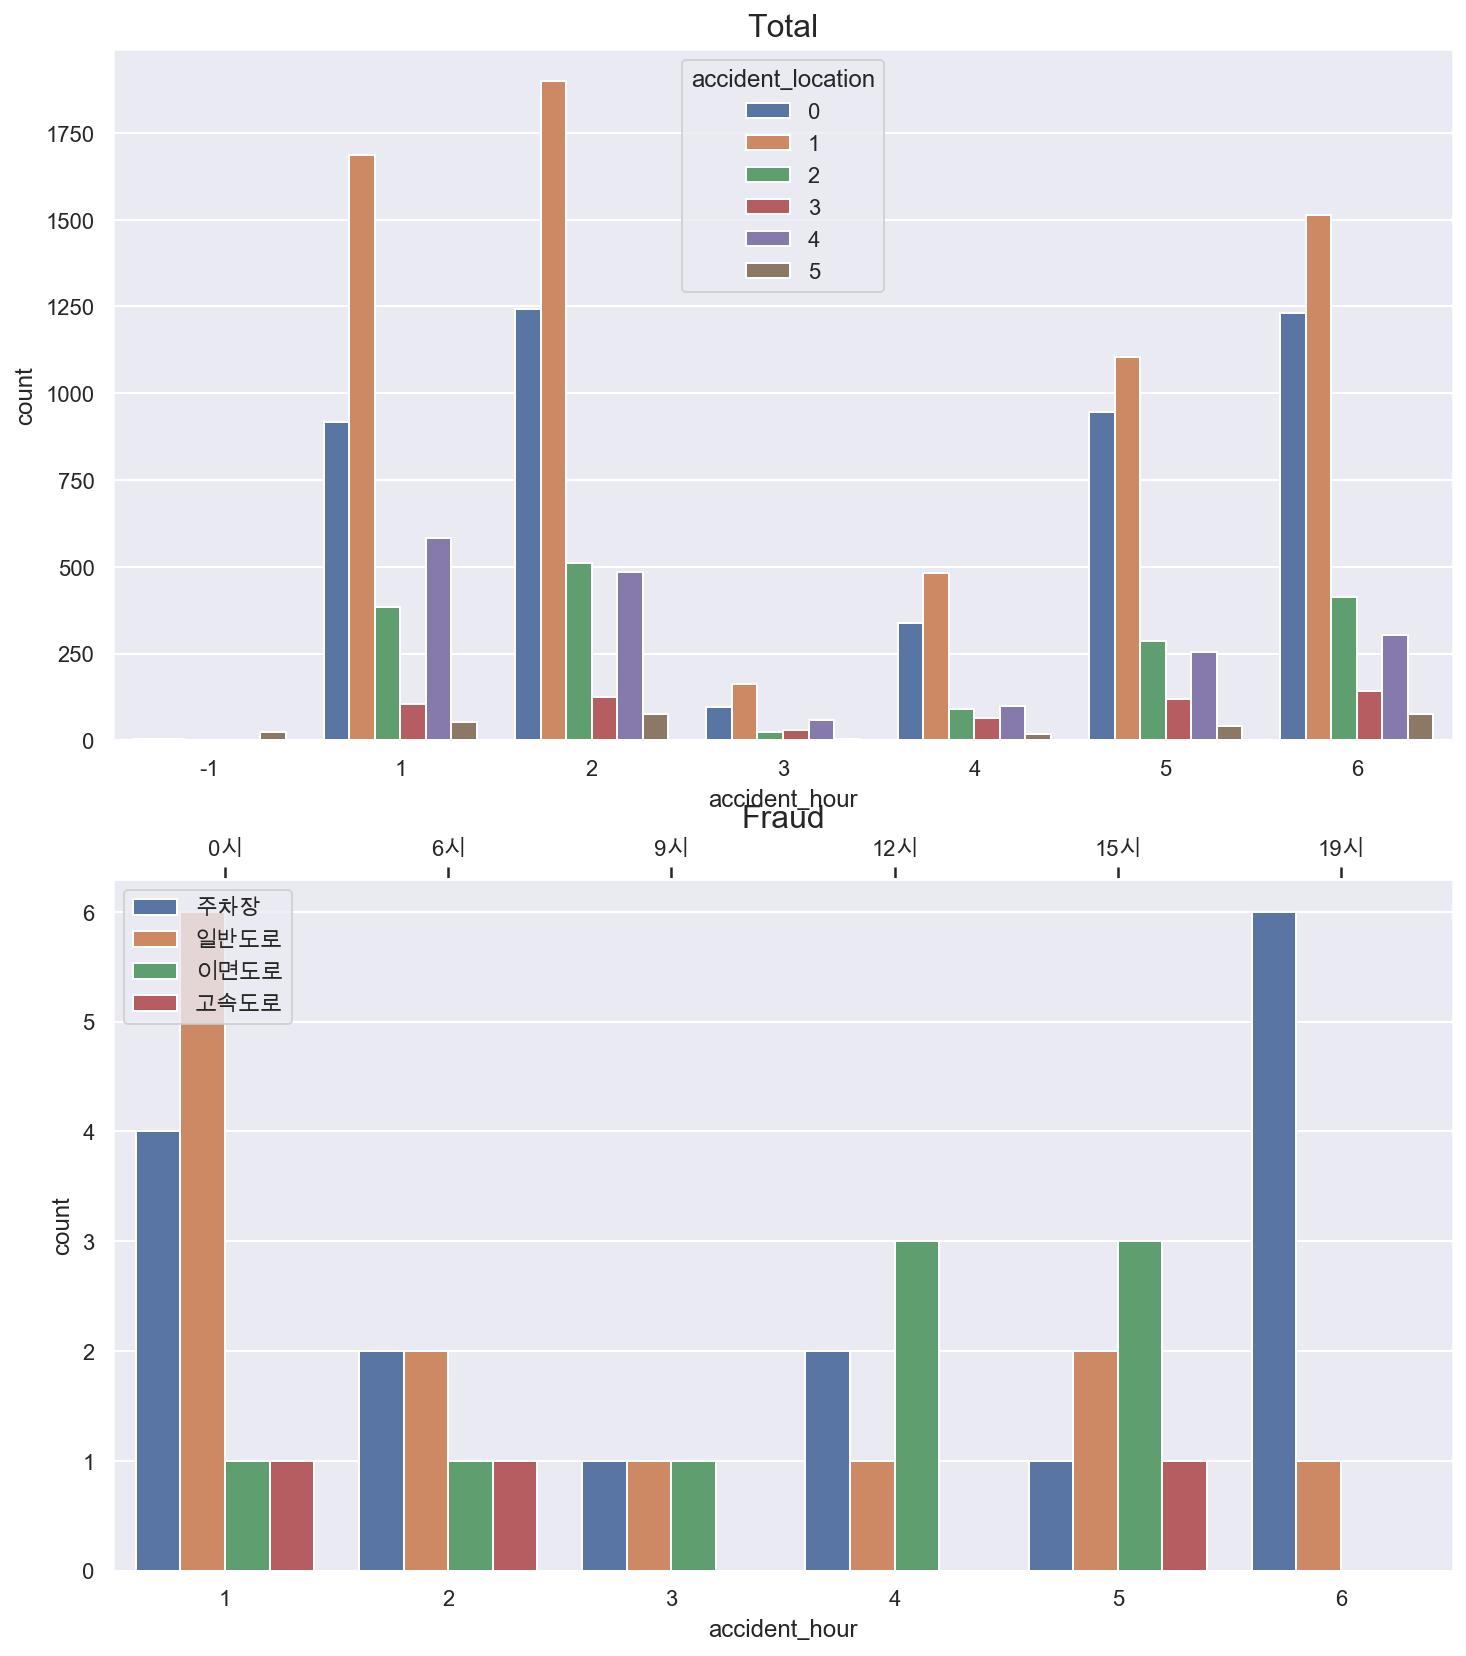

<Figure size 864x576 with 0 Axes>

In [281]:
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='accident_hour',hue='accident_location' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)

sns.countplot(x='accident_hour',hue='accident_location' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16)
ax[1].legend(['주차장','일반도로', '이면도로', '고속도로'])
ax_t = ax[1].secondary_xaxis('top')
ax_t.set_xticks(ticks=np.arange(7))
ax_t.set_xticklabels(labels = ['0시','6시','9시','12시','15시','19시','22시']);


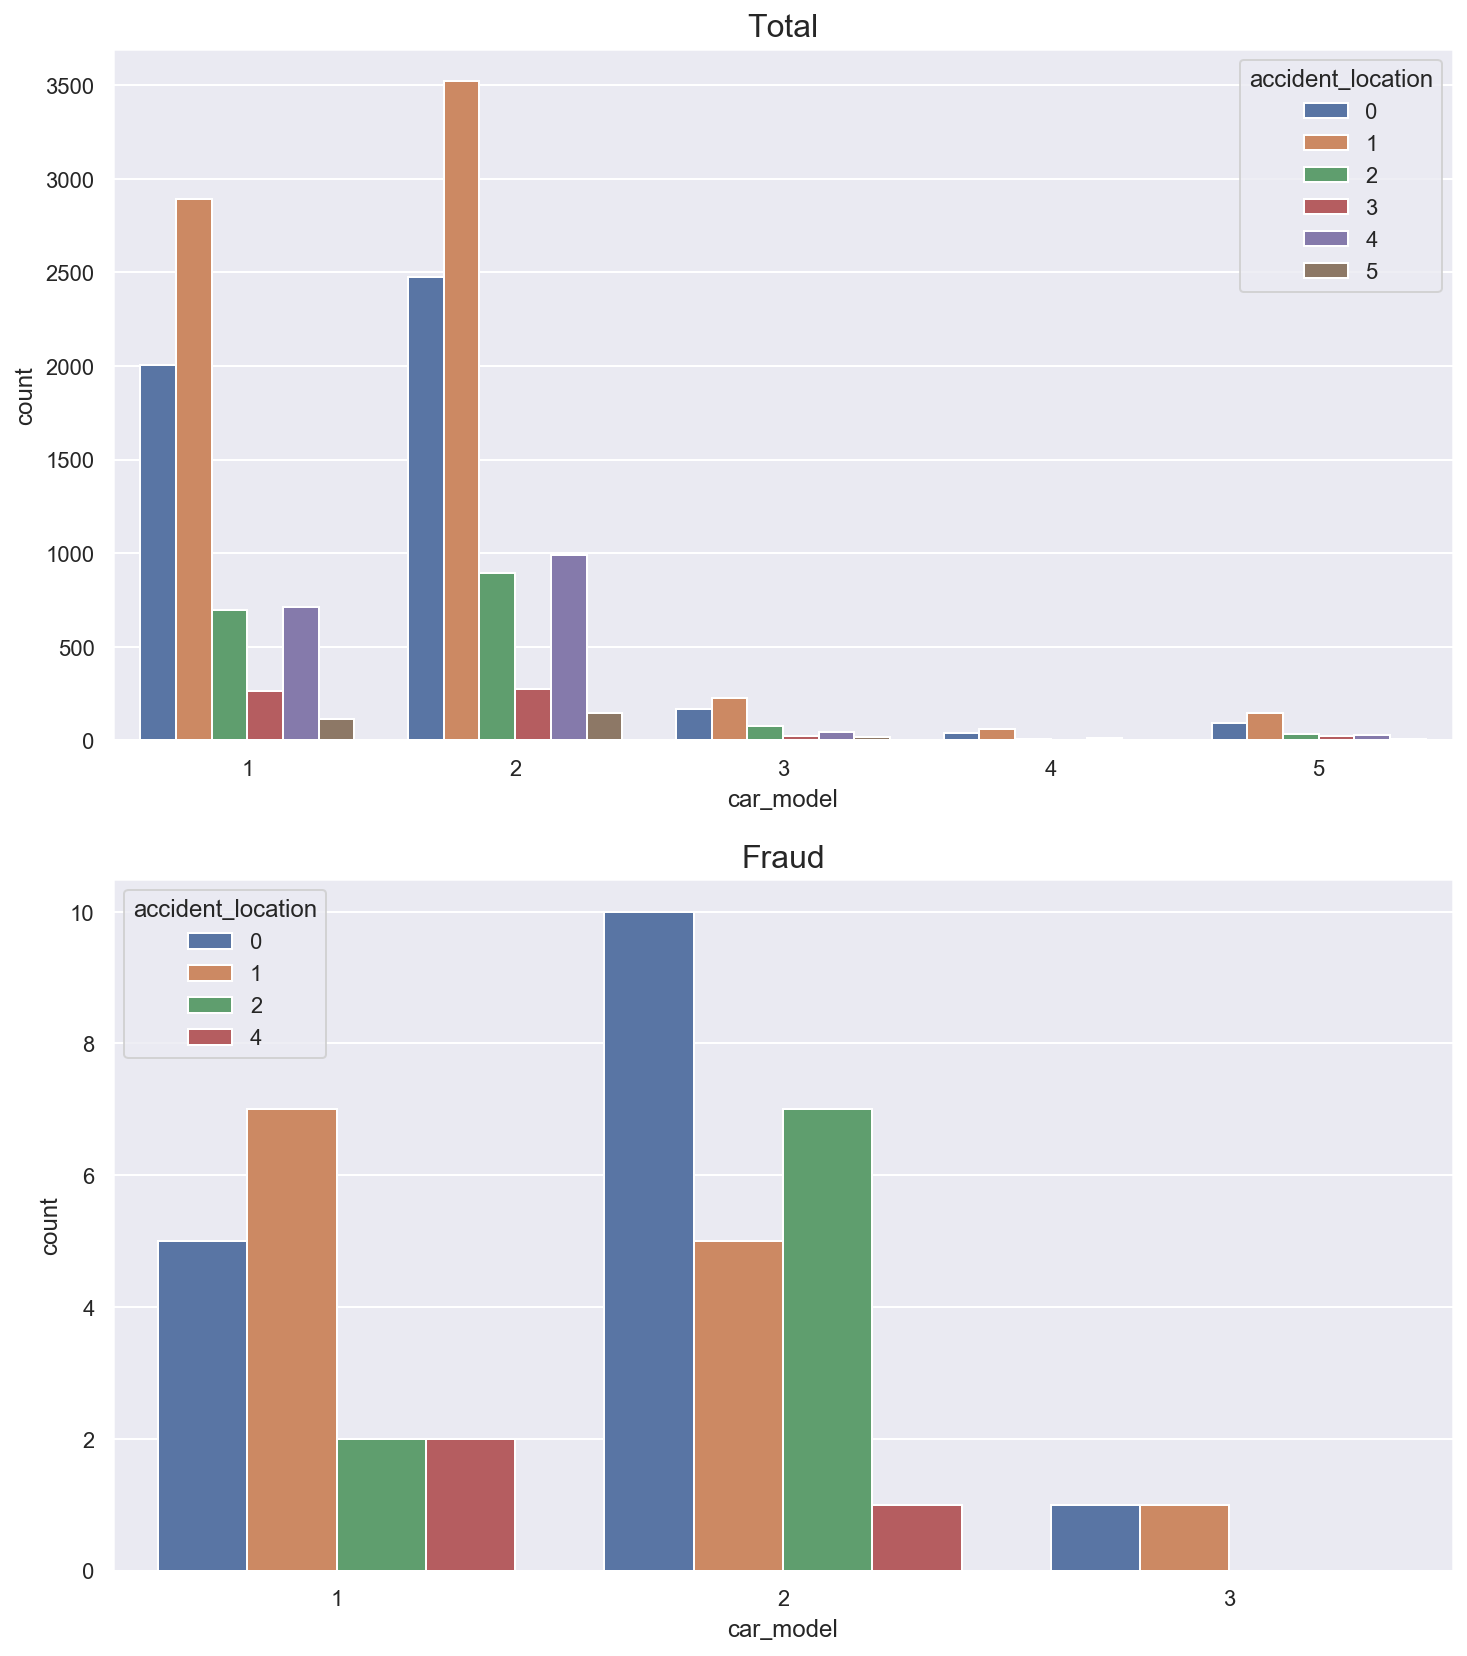

<Figure size 864x576 with 0 Axes>

In [137]:
#차종과 사고위치
fig, ax = plt.subplots(2, 1, figsize=(12, 14))
plt.figure(figsize=(12,8))
sns.countplot(x='car_model',hue='accident_location' ,data=df, ax=ax[0])
ax[0].set_title('Total', fontsize=16)
sns.countplot(x='car_model',hue='accident_location' ,data=df_fr_t, ax=ax[1]);
ax[1].set_title('Fraud', fontsize=16);

# 중형의 

In [149]:
ax = sns.kdeplot(df, bw_method=0.3, hue='fraud_YN', cbar=True) 
ax = sns.kdeplot(df_fr_f['car_model'], bw_method=0.3, label='fraud_0', legend=True)

ValueError: Could not interpret value `fraud_YN` for parameter `hue`

In [48]:
df_tmp = df[['fraud_YN','age_group', 'pf_type','start_hour','duration','accident_hour']].copy()
df_tmp.head()

,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour
0,0,3,2,4,2,4
1,0,4,3,1,4,4
2,0,4,3,1,4,6
3,0,3,2,3,3,5
4,0,1,1,1,1,1


In [60]:
sh = df_tmp_f.iloc[0]['start_hour']

In [65]:
sh2 = df_tmp_f.iloc[1]['start_hour']
sh2

1

In [70]:
next(g)

6

In [101]:
sh2 = timels.index(df_tmp_f.iloc[0]['start_hour'])
sh2

4

In [102]:
sh3 = timels.index(df_tmp_f.iloc[0]['accident_hour'])
sh3

0

In [104]:
dur = df_tmp_f.iloc[0]['duration']
dur

3

In [113]:
len(df_tmp_f)

41

In [131]:
diffls

In [129]:
for idx in range(len(df_tmp_f)):
    diffls = []
    sh = timels.index(df_tmp_f.iloc[idx]['start_hour'])
    ah = timels.index(df_tmp_f.iloc[idx]['accident_hour'])

    if sh > ah:
        diff = ah + 6 - sh
    else:
        diff = ah - sh
        
    diffls = diffls.append(diff)
    df_tmp_f.iloc[idx]['diff'] = diffls

<ipython-input-129-771d21cfc838>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp_f.iloc[idx]['diff'] = diffls
/Users/dockyum/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[key] = value


In [126]:
df_tmp_f.iloc[0]['diff'] = 4
df_tmp_f.head()

<ipython-input-126-97814f36c390>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp_f.iloc[0]['diff'] = 4


,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour,diff
6,1,3,3,6,3,1,3
18,1,1,1,1,2,1,3
45,1,1,1,5,4,6,3
60,1,3,3,2,4,1,3
83,1,2,1,6,2,2,3


In [125]:
# df_tmp_f['diff'] = 3
df_tmp_f.head()

,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour,diff
6,1,3,3,6,3,1,3
18,1,1,1,1,2,1,3
45,1,1,1,5,4,6,3
60,1,3,3,2,4,1,3
83,1,2,1,6,2,2,3


In [ ]:
while True:
    if next(pool) == df_tmp_f.iloc[0]['start_hour']:
        sh = 

In [109]:
pool

In [107]:
next(pool)

2

In [ ]:
dur = 1
timels[]

In [78]:
df_tmp_f.iloc[0]['duration']

3

In [67]:
g = (i for i, e in enumerate(timels) if e == sh2)

In [66]:
timels.index(sh2)

0

In [79]:
from itertools import cycle

timels = [1,3,4,5,6,2]
pool = cycle(timels)

In [98]:
next(pool)

6

In [51]:
df_tmp_f = df_tmp[df_tmp['fraud_YN'] == 1]
df_tmp_f

,fraud_YN,age_group,pf_type,start_hour,duration,accident_hour
6,1,3,3,6,3,1
18,1,1,1,1,2,1
45,1,1,1,5,4,6
60,1,3,3,2,4,1
83,1,2,1,6,2,2
100,1,2,1,4,2,4
119,1,5,3,2,3,2
143,1,1,2,2,1,1
163,1,4,3,5,2,5
182,1,3,1,5,3,1


In [ ]:
df_tmp['diff_hour'] = 